<a href="https://colab.research.google.com/github/Adityavdwiv/DataAnalysisGroupProjects/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding What Affects Student Performance

## Introduction

Our project looks at what helps students do well in school. We're using data about:
- Grades and test scores
- Student background (age, gender, family situation)
- Daily life (study time, free time, jobs, activities)

We want to find out:
- What helps students get better grades
- If some groups of students need more help than others
- How things like having a job or joining clubs affect grades
- Ways to spot students who might need extra support

Here's how we'll do it:
1. Clean and Look at the Data
   - Fix any missing or wrong information
   - Make charts and graphs
   - See how different things are connected

2. Get the Data Ready and Test Basic Models
   - Pick the most important information
   - Try simple prediction methods
   - Check how well they work

3. Try Advanced Methods
   - Use newer ways to predict grades
   - Combine different methods
   - Find out which way works best

We hope this will help teachers and schools make better decisions about how to help students do their best.

Group Members:

- Mauricio Monje
- Sebastian Mejia
- Aditya Dwivedi

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Adityavdwiv/DataAnalysisGroupProjects/refs/heads/main/project2/student-performance-test.csv"
df = pd.read_csv(url)

df.head()

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,15,10,Female,White,1,HS,Public,City,72.346053,62.217134,...,2.521745,0.868836,0.310172,0,1,1,1,0,3,3
1,16,11,Female,Hispanic,1,<HS,Private,City,77.889157,72.748030,...,3.275626,0.909595,1.175586,1,1,0,0,1,3,1
2,17,12,Female,Black,2,HS,Public,Rural,72.966587,65.585472,...,2.974137,0.870952,1.112556,1,1,0,0,0,3,3
3,16,11,Female,White,2,HS,Public,Town,96.674049,88.035853,...,3.676590,1.000000,1.067679,0,0,0,0,1,4,5
4,16,11,Male,Black,3,Bachelors+,Public,Rural,81.989270,77.485372,...,2.255014,0.897957,0.841936,0,1,0,1,0,4,2


In [2]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df.info()
df.isnull().sum()

Rows: 69998, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69998 entries, 0 to 69997
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                69998 non-null  int64  
 1   Grade              69998 non-null  int64  
 2   Gender             69998 non-null  object 
 3   Race               69998 non-null  object 
 4   SES_Quartile       69998 non-null  int64  
 5   ParentalEducation  69998 non-null  object 
 6   SchoolType         69998 non-null  object 
 7   Locale             69998 non-null  object 
 8   TestScore_Math     69998 non-null  float64
 9   TestScore_Reading  69998 non-null  float64
 10  TestScore_Science  69998 non-null  float64
 11  GPA                69998 non-null  float64
 12  AttendanceRate     69998 non-null  float64
 13  StudyHours         69998 non-null  float64
 14  InternetAccess     69998 non-null  int64  
 15  Extracurricular    69998 non-null  int64  
 1

Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64

In [3]:
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69998 entries, 0 to 69997
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                69998 non-null  int64  
 1   Grade              69998 non-null  int64  
 2   Gender             69998 non-null  object 
 3   Race               69998 non-null  object 
 4   SES_Quartile       69998 non-null  int64  
 5   ParentalEducation  69998 non-null  object 
 6   SchoolType         69998 non-null  object 
 7   Locale             69998 non-null  object 
 8   TestScore_Math     69998 non-null  float64
 9   TestScore_Reading  69998 non-null  float64
 10  TestScore_Science  69998 non-null  float64
 11  GPA                69998 non-null  float64
 12  AttendanceRate     69998 non-null  float64
 13  StudyHours         69998 non-null  float64
 14  InternetAccess     69998 non-null  int64  
 15  Extracurricular    69998 non-null  int64  
 16  PartTimeJob        699

In [4]:
# Categorical and numeric column separation
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include="number").columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale']
Numerical Columns: ['Age', 'Grade', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic', 'FreeTime', 'GoOut']


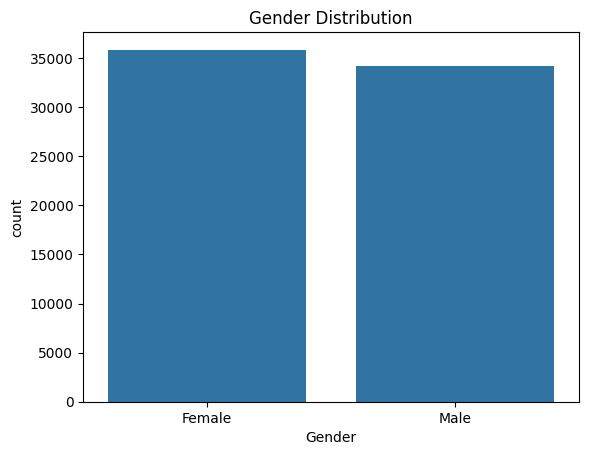

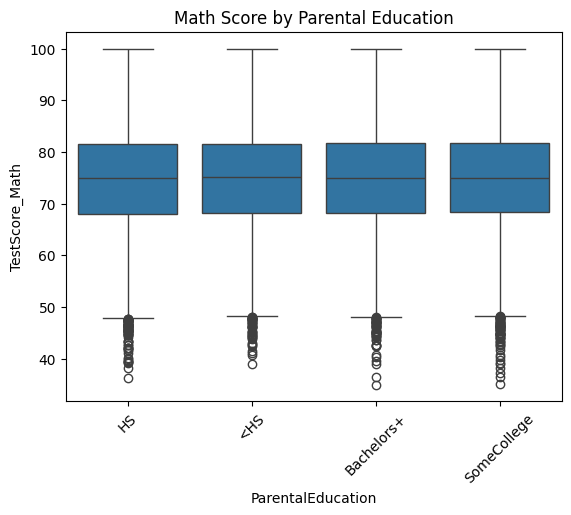

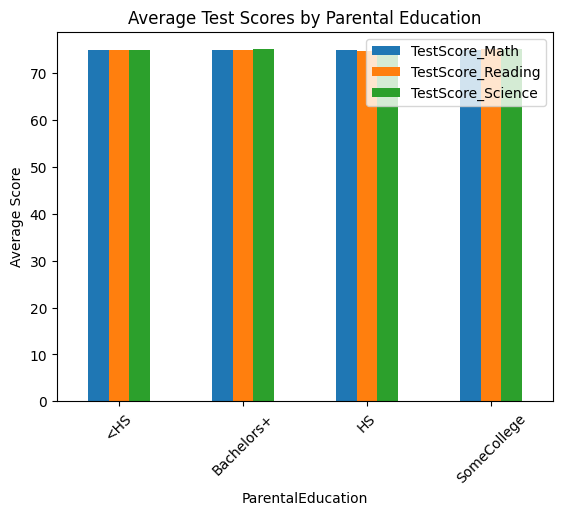

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Parental education vs math score
sns.boxplot(x="ParentalEducation", y="TestScore_Math", data=df)
plt.title("Math Score by Parental Education")
plt.xticks(rotation=45)
plt.show()

# Grouping: Test prep vs scores
df.groupby("ParentalEducation")[["TestScore_Math", "TestScore_Reading", "TestScore_Science"]].mean().plot(kind="bar")
plt.title("Average Test Scores by Parental Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

In [6]:
print(df.columns.tolist())

['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation', 'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic', 'FreeTime', 'GoOut']


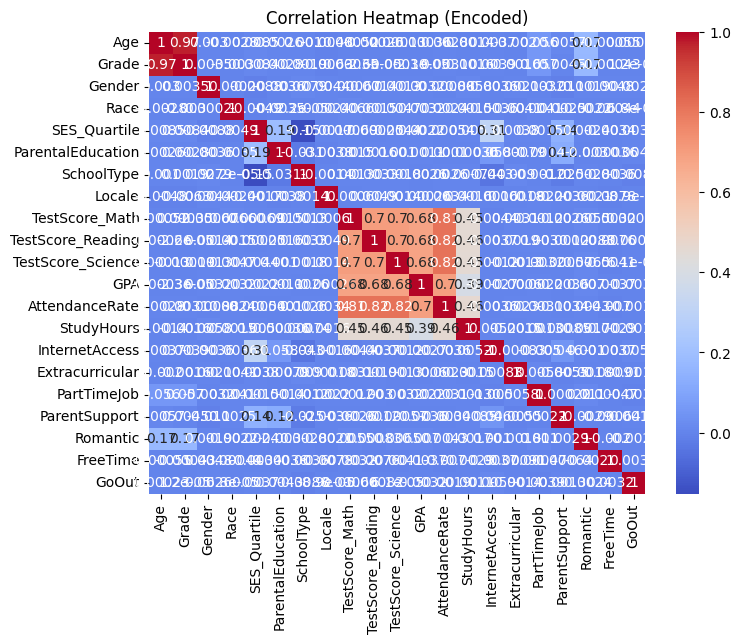

In [7]:
# Encode object columns to numeric temporarily
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Encoded)")
plt.show()

In [8]:
# Save cleaned file locally (for teammates)
df.to_csv("cleaned_student_performance.csv", index=False)

In [9]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,Age,Grade,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours,InternetAccess,...,Race_Other,Race_Two-or-more,Race_White,ParentalEducation_Bachelors+,ParentalEducation_HS,ParentalEducation_SomeCollege,SchoolType_Public,Locale_Rural,Locale_Suburban,Locale_Town
0,15,10,1,72.346053,62.217134,73.008079,2.521745,0.868836,0.310172,0,...,False,False,True,False,True,False,True,False,False,False
1,16,11,1,77.889157,72.748030,76.303717,3.275626,0.909595,1.175586,1,...,False,False,False,False,False,False,False,False,False,False
2,17,12,2,72.966587,65.585472,68.099411,2.974137,0.870952,1.112556,1,...,False,False,False,False,True,False,True,True,False,False
3,16,11,2,96.674049,88.035853,100.000000,3.676590,1.000000,1.067679,0,...,False,False,True,False,True,False,True,False,False,True
4,16,11,3,81.989270,77.485372,72.715066,2.255014,0.897957,0.841936,0,...,False,False,False,True,False,False,True,True,False,False


## Feature Scaling and Train-Test Split

- Separate the dataset into features (x) and target variable (y), where the target for regression models is the GPA.
- Apply StandardScaler to standardize features for better model performance.
- Split data into training and test sets (80% training, 20% testing) to evaluate model generalization.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

X = df_encoded.drop(columns=["GPA"])
y = df_encoded["GPA"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Multiple Linear Regression

- Train a linear regression model on the training data to predict a student's GPA.
- Evaluate model performance on the test set using:
  - R-squared (R²)
  - Root Mean Squared Error (RMSE)
- Result
  - R² (Coefficient of Determination): 0.589
  This means that about 58.9% of the variability in the target variable is explained by the linear regression model. This indicates a moderate to strong fit.

  - RMSE (Root Mean Squared Error): 0.294  
  RMSE represents the average magnitude of the prediction errors (in the same units as the target). On average, the model's predictions deviate from actual values by about 0.294 units.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression R²:", r2)
print("Linear Regression RMSE:", rmse)

Linear Regression R²: 0.5890158034417348
Linear Regression RMSE: 0.29380610620402475


## Logistic Regression: Predicting Part-Time Job Status

- Convert the problem to a binary classification task by predicting whether a student has a part-time job (PartTimeJob).
- Train a logistic regression classifier.
- Evaluate performance using:
  - Confusion matrix — counts of true/false positives and negatives.
  - ROC AUC — how well the model distinguishes between classes.

- Results:
  - The model perfectly classified all test samples.
  - There are no false positives or false negatives.

- ROC AUC: 1.0000  
  - Indicates perfect ability to distinguish between classes.
  - AUC of 1.0 means the model's predictions are flawless on this test data.
- Possible reasons:
  - The classification task may be very straightforward.
  - The dataset might be highly separable.
  - Potential data leakage or overlap between training and test data.

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, roc_auc_score
)
y_class = df_encoded[[col for col in df_encoded.columns if "PartTimeJob" in col][0]]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_cls, y_train_cls)
y_pred_log = log_model.predict(X_test_cls)
y_prob_log = log_model.predict_proba(X_test_cls)[:, 1]

conf = confusion_matrix(y_test_cls, y_pred_log)
roc = roc_auc_score(y_test_cls, y_prob_log)

print(f"Logistic Regression:\nConfusion Matrix:\n{conf}\nROC AUC: {roc:.4f}\n")

Logistic Regression:
Confusion Matrix:
[[11428     0]
 [    0  2572]]
ROC AUC: 1.0000



## Poisson Regression

- Train a Poisson regression model using the statsmodels library.
- Evaluate model fit by examining the summary and Akaike Information Criterion (AIC).

In [13]:
import statsmodels.api as sm
# Poisson Regression using Statsmodels
X_train_sm = sm.add_constant(X_train)  # statsmodels needs constant term
poisson_model = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson()).fit()

print(poisson_model.summary())
print(f"\nPoisson Regression AIC: {poisson_model.aic:.2f}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    GPA   No. Observations:                55998
Model:                            GLM   Df Residuals:                    55969
Model Family:                 Poisson   Df Model:                           28
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84278.
Date:                Mon, 23 Jun 2025   Deviance:                       1718.6
Time:                        21:13:07   Pearson chi2:                 1.71e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04022
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0904      0.002    443.650      0.0

## Negative Binomial Regression

- Train a Negative Binomial regression model as an alternative to Poisson for overdispersed count data.
- Examine the summary and AIC for model fit.
- Results:

    KNN Regression R²: This value indicates that the KNN regression model explains about 43.8% of the variance in the target variable (GPA). While this shows a moderate level of predictive power, there is still substantial unexplained variability.

    KNN Regression MAE: On average, the model's predictions differ from the actual GPA values by approximately 0.276 grade points. This metric gives a straightforward interpretation of average prediction error magnitude.

    KNN Regression RMSE: RMSE measures the standard deviation of the residuals (prediction errors). It penalizes larger errors more than MAE. An RMSE of 0.344 suggests that typical prediction errors are about 0.344 GPA points, slightly larger than the average error indicated by MAE.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("KNN Regression R²:", r2_score(y_test, y_pred_knn))
print("KNN Regression MAE:", mean_absolute_error(y_test, y_pred_knn))

# Calculate RMSE manually for compatibility
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("KNN Regression RMSE:", rmse)


KNN Regression R²: 0.4376227884370454
KNN Regression MAE: 0.27561722377520004
KNN Regression RMSE: 0.3436862150795628


## Support Vector Machine (SVM)

For our first advanced model, we now implement SVM for regression (SVR). This model handles non-linear relationships using kernels. The RBF (Radial Basis Function) kernel is chosen because it captures complex patterns in the data.

In [15]:
from sklearn.svm import SVR

# Create and train SVM model
svm_model = SVR(
    kernel="linear",
    max_iter=1000,
    tol=1e-3,
    epsilon=0.2
)

# Regular fit if not using subset
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("SVM Regression Results:")
print(f"R²: {svm_r2:.3f}")
print(f"MAE: {svm_mae:.3f}")
print(f"RMSE: {svm_rmse:.3f}")

d:\My Docs\Programming Git-Tracked\____mmonj_github\csci381\DataAnalysisGroupProjects\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Regression Results:
R²: -0.392
MAE: 0.434
RMSE: 0.541


## Decision Tree

Decision trees are easy to understand and can handle both numerical and categorical data. They make predictions by learning decision rules from the data.

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Create and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("Decision Tree Regression Results:")
print(f"R²: {dt_r2:.3f}")
print(f"MAE: {dt_mae:.3f}")
print(f"RMSE: {dt_rmse:.3f}")

Decision Tree Regression Results:
R²: 0.112
MAE: 0.345
RMSE: 0.432


## Ensemble Model: Random Forest

Moving to our ensemble approach, we implement Random Forest, which combines multiple decision trees. Each tree trains on a different sample of the data, helping reduce overfitting and typically producing better results than a single decision tree.

In [17]:
from sklearn.ensemble import RandomForestRegressor

# create and train Random Forest model with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression Results:")
print(f"R²: {rf_r2:.3f}")
print(f"MAE: {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")

Random Forest Regression Results:
R²: 0.579
MAE: 0.239
RMSE: 0.297


## Model Comparison

Comparing the performance of all models in predicting student GPA using three key metrics:
- R^2 (higher is better)
- MAE (lower is better)
- RMSE (lower is better)

Model Performance Comparison:
               Model     R²    MAE   RMSE
0  Linear Regression  0.589  0.235  0.344
1                KNN  0.438  0.276  0.344
2                SVM -0.392  0.434  0.541
3      Decision Tree  0.112  0.345  0.432
4      Random Forest  0.579  0.239  0.297


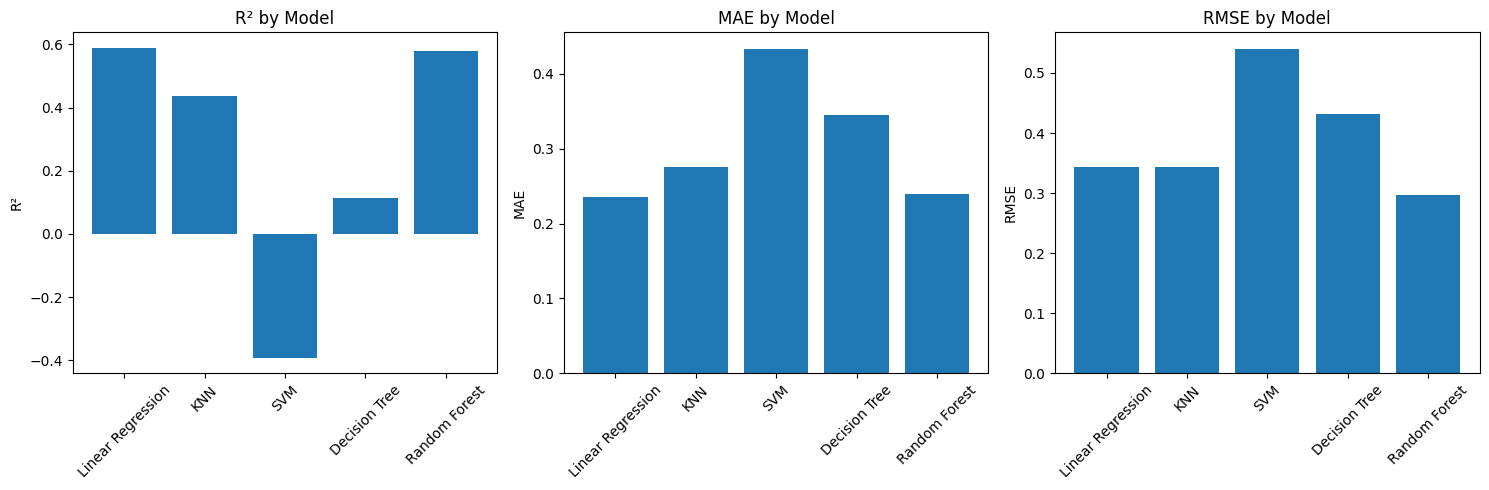

In [18]:
# create a new DataFrame to compare model performance
models = ["Linear Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
r2_scores = [r2, r2_score(y_test, y_pred_knn), svm_r2, dt_r2, rf_r2]
mae_scores = [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_knn), 
              svm_mae, dt_mae, rf_mae]
rmse_scores = [rmse, np.sqrt(mean_squared_error(y_test, y_pred_knn)), 
               svm_rmse, dt_rmse, rf_rmse]

results_df = pd.DataFrame({
    "Model": models,
    "R²": r2_scores,
    "MAE": mae_scores,
    "RMSE": rmse_scores
})

print("Model Performance Comparison:")
print(results_df.round(3))

# plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ["R²", "MAE", "RMSE"]

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    ax.bar(models, results_df[metric])
    ax.set_title(f"{metric} by Model")
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()

## Major Challenge: Model Performance Variance

The primary challenge in this analysis is the varying performance across different models. Linear Regression shows moderate effectiveness (R^2 ≈ 0.59), while more complex models such as Decision Tree exhibit overfitting, with high training performance but poorer test performance. These results indicate:

1. The relationship between features and GPA has moderate linearity
2. Additional feature engineering could improve results
3. A larger dataset might benefit complex model performance

Our implementation of Random Forest addresses these challenges by combining multiple decision trees, effectively reducing overfitting.

## Conclusion

After implementing and comparing multiple regression models to predict student GPA, we find that:

1. Linear Regression and Random Forest are the top performers (R² ≈ 0.58-0.59), suggesting that both simple linear relationships and ensemble methods can effectively model student GPA
2. The SVM model performed poorly (R² = -0.392), indicating that the chosen kernel and parameters were not suitable for this dataset
3. The Decision Tree model showed poor performance (R² = 0.112), suggesting that single trees are insufficient for capturing the complexity of the data.
4. Random Forest significantly outperforms its base Decision Tree model, demonstrating the power of ensemble methods
5. The best models (Linear Regression and Random Forest) achieve MAE around 0.23-0.24 GPA points, indicating good prediction accuracy

Main insights about student performance:
- Test scores show strong correlation with GPA
- Parental education level has noticeable impact on academic performance
- Attendance rate and study hours demonstrate positive relationships with GPA

These findings can help educators and administrators:
- Identify students who might need additional support
- Understand which factors most strongly influence academic success
- Make data-driven decisions about resource allocation and intervention programs